In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import math

In [31]:
theoretical_values = pd.read_csv(filepath_or_buffer='./Inputs_Assessment_Task_3_Laboratory_Report/theoretical_values.csv')
theoretical_values['friction_factor'] = theoretical_values.apply(
    lambda arg: 64/arg.reynolds_number if arg.reynolds_number else 0.316*(arg.reynolds_number**-0.25), axis=1)
theoretical_values

,no,flow_regime,reynolds_number,friction_factor
0,1,laminar,100,0.640000
1,2,laminar,200,0.320000
2,3,laminar,400,0.160000
3,4,laminar,800,0.080000
4,5,laminar,1600,0.040000
5,6,laminar,2000,0.032000
6,7,turbulent,4000,0.016000
7,8,turbulent,6000,0.010667
8,9,turbulent,8000,0.008000
9,10,turbulent,10000,0.006400


In [32]:
water_kinematic_viscosity = pd.read_csv(filepath_or_buffer='./Inputs_Assessment_Task_3_Laboratory_Report/water_kinematic_viscosity.csv')
water_kinematic_viscosity.kinematic_viscosity = water_kinematic_viscosity.kinematic_viscosity*(10**-6)
water_kinematic_viscosity;

In [33]:
diameter = 0.003
length = 0.5
print(diameter, length, sep='\n')

0.003
0.5


In [34]:
test_01 = pd.read_csv(filepath_or_buffer='./Inputs_Assessment_Task_3_Laboratory_Report/pipe_test_01.csv')
temperature = float(test_01.iloc[9,0])
test_01 = test_01[:-2]
kinematic_viscosity = water_kinematic_viscosity[water_kinematic_viscosity.temperature == temperature].iloc[0,1]
test_01

,test_number,h1,h2,volume,time
0,1,63.0,427.0,255.0,01:00.26
1,2,80.0,410.0,245.0,01:00.29
2,3,103.0,389.0,230.0,01:00.05
3,4,119.0,374.0,215.0,01:00.14
4,5,141.0,353.0,185.0,01:00.19
5,6,162.0,336.0,165.0,01:00.22
6,7,180.0,319.0,145.0,01:00.12
7,8,201.0,301.0,105.0,01:00.28


In [35]:
print(temperature, kinematic_viscosity, sep='\n')

29.0
8.179999999999999e-07


In [36]:
test_01.h1 = test_01.h1/1000
test_01.h2 = test_01.h2/1000
test_01['hl'] = test_01.h2 - test_01.h1
test_01.volume = test_01.volume/1000
test_01.time = pd.to_timedelta('00:' + test_01.time.astype(str))/dt.timedelta(seconds=1)
test_01 = test_01[test_01.columns[[0,1,2,5,3,4]]]
test_01

,test_number,h1,h2,hl,volume,time
0,1,0.063,0.427,0.364,0.255,60.26
1,2,0.080,0.410,0.330,0.245,60.29
2,3,0.103,0.389,0.286,0.230,60.05
3,4,0.119,0.374,0.255,0.215,60.14
4,5,0.141,0.353,0.212,0.185,60.19
5,6,0.162,0.336,0.174,0.165,60.22
6,7,0.180,0.319,0.139,0.145,60.12
7,8,0.201,0.301,0.100,0.105,60.28


In [37]:
test_01.rename(columns={'hl':'head_loss'}, inplace=True)
test_01['discharge'] = (test_01.volume/test_01.time)/1000
test_01['velocity'] = test_01.discharge/(math.pi*(diameter**2)/4)
test_01['friction_factor'] = test_01.head_loss*diameter*(2*9.81)/(length*(test_01.velocity**2))
test_01['reynolds_number'] = test_01.velocity*diameter/kinematic_viscosity
test_01 = test_01[test_01.columns[[0,3,4,5,6,7,8,9]]]
test_01

,test_number,head_loss,volume,time,discharge,velocity,friction_factor,reynolds_number
0,1,0.364,0.255,60.26,0.000004,0.598658,0.119562,2195.566589
1,2,0.330,0.245,60.29,0.000004,0.574895,0.117540,2108.416279
2,3,0.286,0.230,60.05,0.000004,0.541854,0.114670,1987.240294
3,4,0.255,0.215,60.14,0.000004,0.505758,0.117356,1854.857696
4,5,0.212,0.185,60.19,0.000003,0.434825,0.131995,1594.714508
5,6,0.174,0.165,60.22,0.000003,0.387624,0.136326,1421.604381
6,7,0.139,0.145,60.12,0.000002,0.341206,0.140550,1251.366691
7,8,0.100,0.105,60.28,0.000002,0.246424,0.193858,903.756878


In [38]:
xmin = test_01.reynolds_number.min()
xmax = test_01.reynolds_number.max()
print(min, max, sep='\n')

<built-in function min>
<built-in function max>


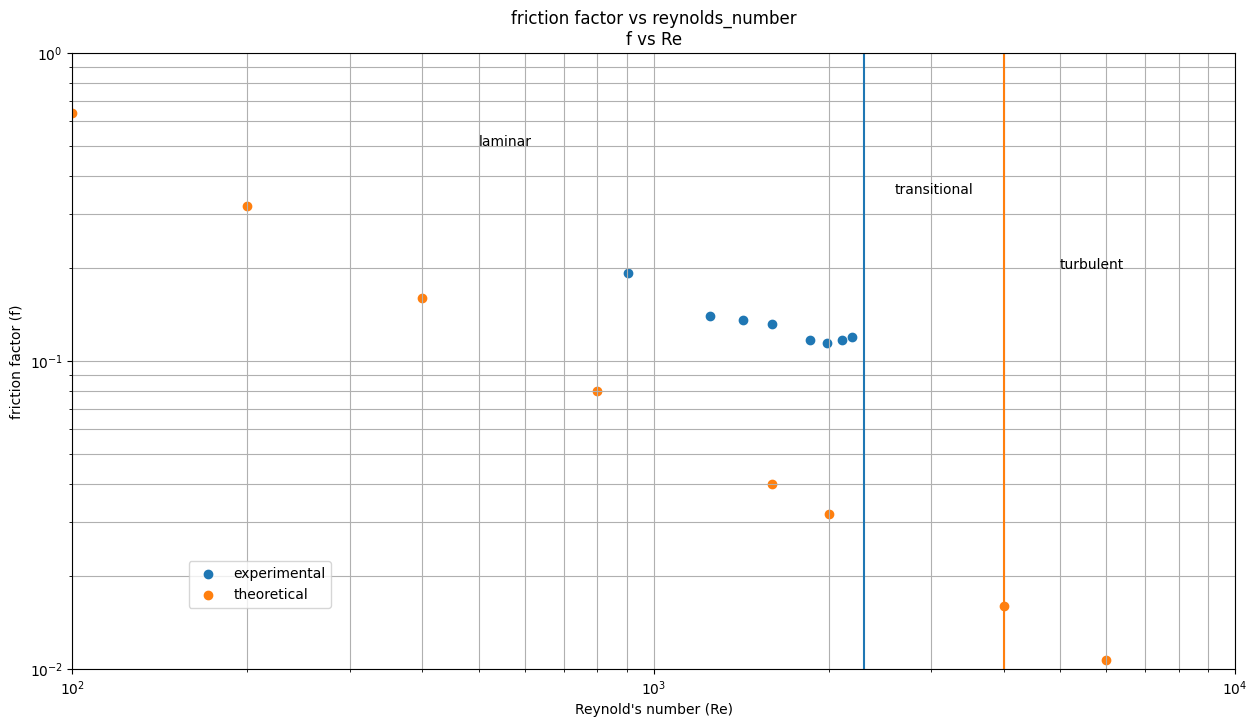

In [39]:
fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.scatter(test_01.reynolds_number, test_01.friction_factor, label='experimental')
ax1.scatter(theoretical_values.reynolds_number, theoretical_values.friction_factor, label='theoretical')
ax1.plot([2300,2300], [0.01, 1])
ax1.plot([4000,4000], [0.01, 1])
ax1.legend(loc=(.1,.1))
plt.xlim(100,10000)
plt.ylim(0.01,1)
plt.xscale('log')
plt.yscale('log')
plt.grid(which='minor')
plt.grid(which='major')
plt.title('friction factor vs reynolds_number\nf vs Re')
plt.xlabel('Reynold\'s number (Re)')
plt.ylabel('friction factor (f)')
plt.text(x=5000, y=0.2, s='turbulent')
plt.text(x=2600, y=0.35, s='transitional')
plt.text(x=500, y=0.5, s='laminar');

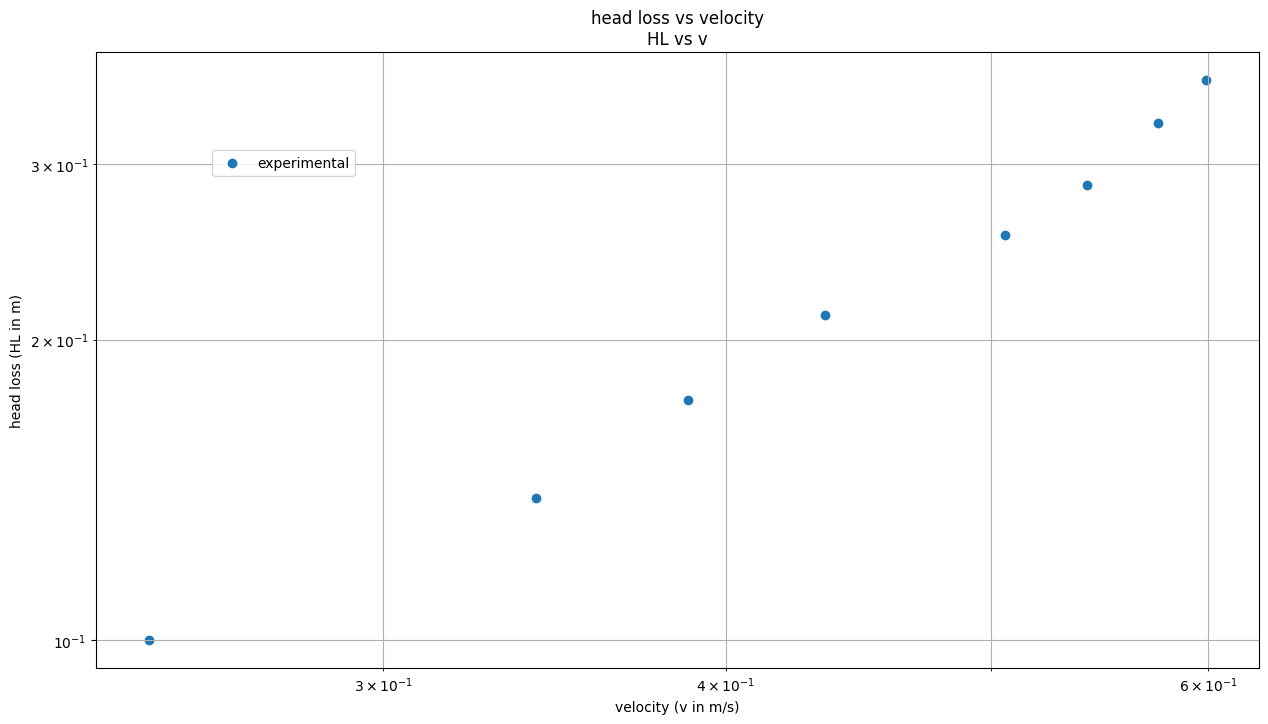

In [40]:
fig2, ax2 = plt.subplots(figsize=(15,8))
ax2.scatter(test_01.velocity, test_01.head_loss, label='experimental')
ax2.legend(loc=(.1,.8))
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major')
plt.grid(which='minor')
plt.title('head loss vs velocity\nHL vs v')
plt.xlabel('velocity (v in m/s)')
plt.ylabel('head loss (HL in m)');